Let's see what our models have managed to learn:

In [1]:
from generate import generate_conditionally

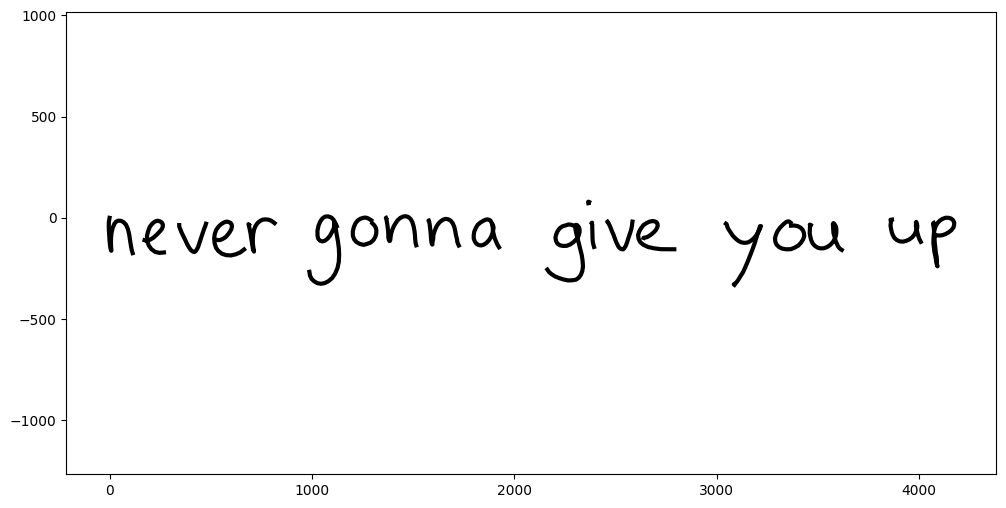

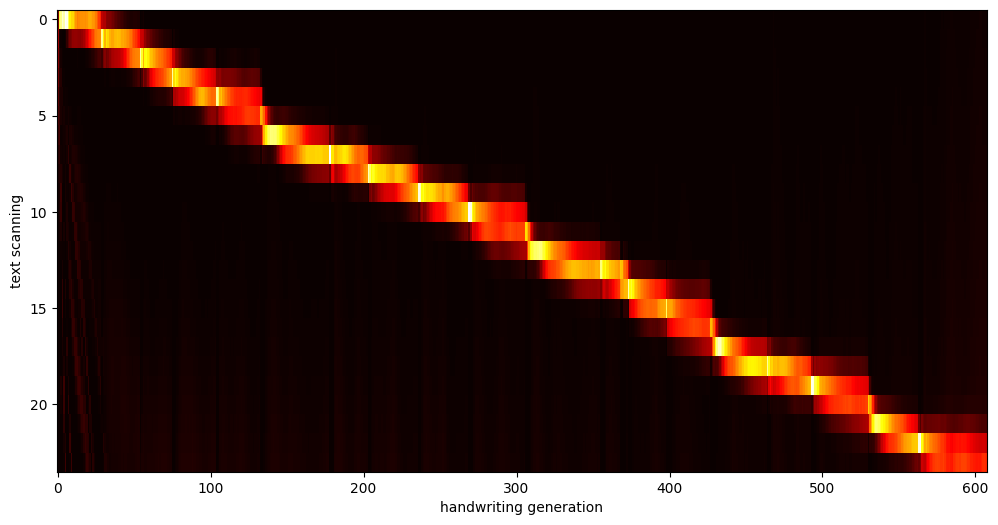

In [3]:
generate_conditionally('never gonna give you up ', state_dict_file='outputs\\save_iam_successful\\epoch_60.pt', cell_size=512, char_to_code_file='datasets\\data_iam_normalized\\char_to_code.pt', bias=1., bias2=1.)#, priming_x=torch.Tensor(seq).unsqueeze(0).cuda(), priming_text=label)

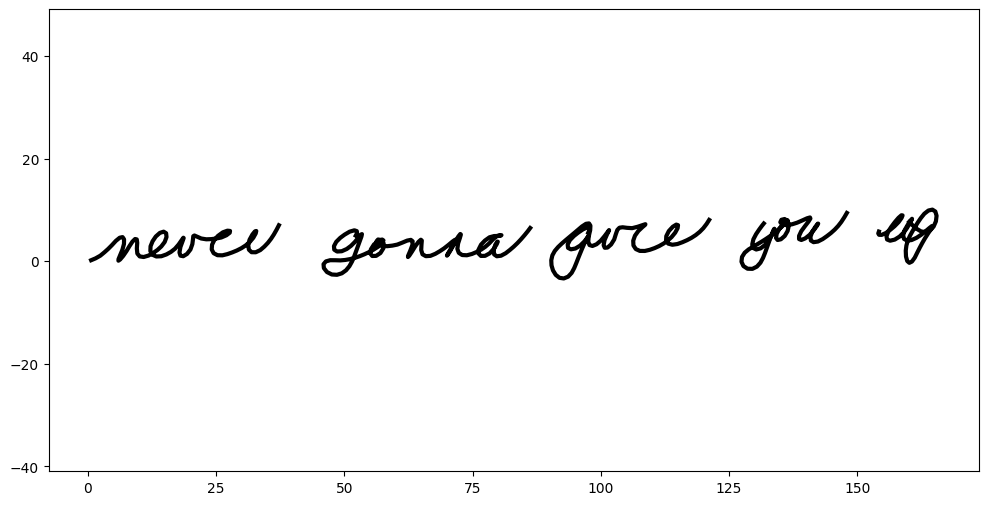

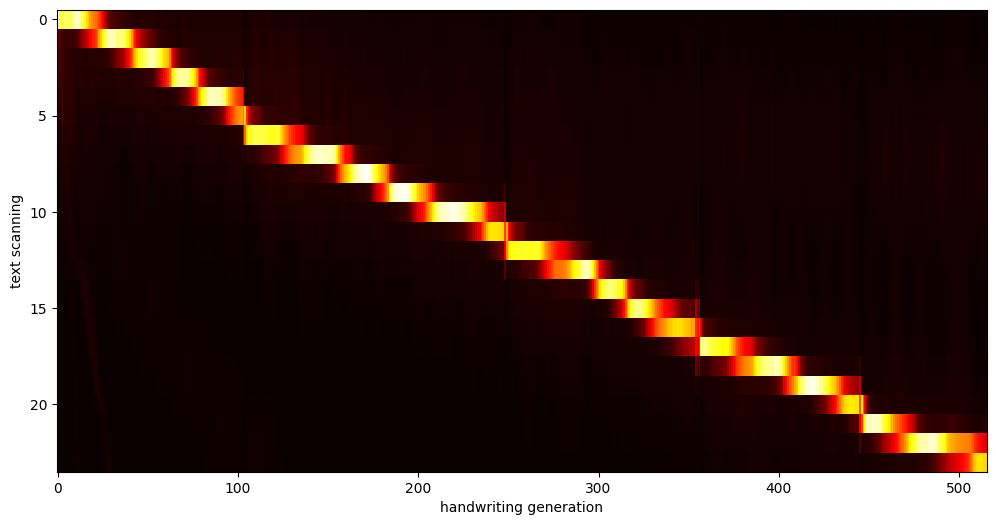

In [15]:
#generate_conditionally('hello', state_dict_file='outputs\\save_pureeng_reduced_adam\\epoch_10.pt', cell_size=512, char_to_code_file='datasets\\data_inkwell_preprocessed\\char_to_code.pt', bias=1., bias2=1.)
generate_conditionally('never gonna give you up ', state_dict_file='save_pureeng_full_rms_continuewithlr0.0005_WORKING!!!\\epoch_90.pt', cell_size=512, char_to_code_file='datasets\\data_inkwell_preprocessed\\char_to_code.pt', bias=1., bias2=1.)
#generate_conditionally('never gonna give you up ', state_dict_file='save\epoch_79.pt', cell_size=512, char_to_code_file='datasets\\data_inkwell_preprocessed\\char_to_code.pt', bias=1., bias2=1.)

C:\Users\shudesai\AppData\Local\Temp\ipykernel_62528\1526269914.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  char_to_code = torch.load('datasets/data_iam_normalized/c

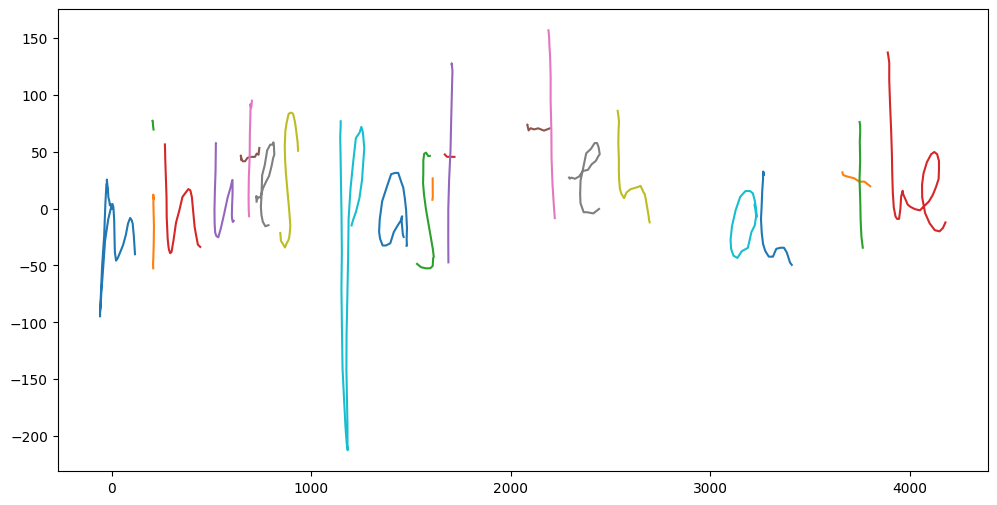

0 minutes past ten on the


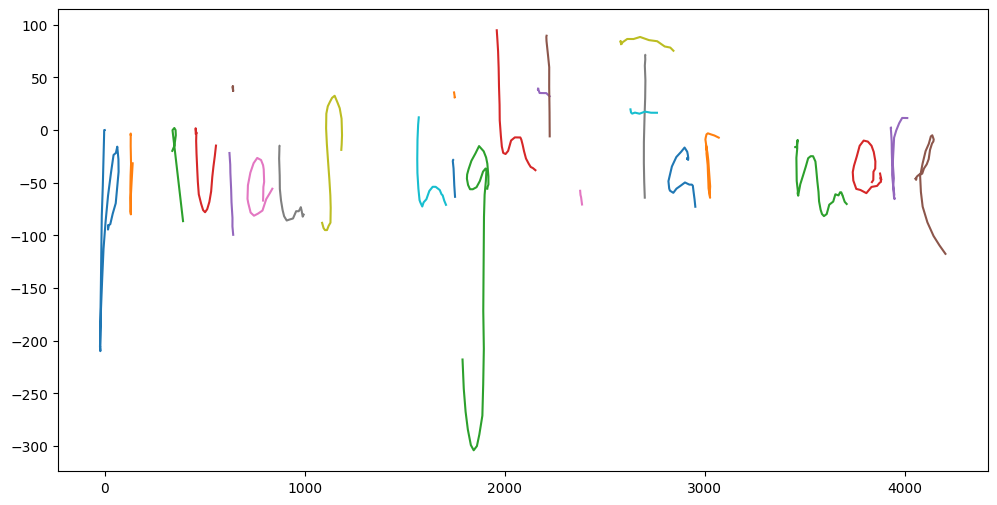

1 previous night. Far more


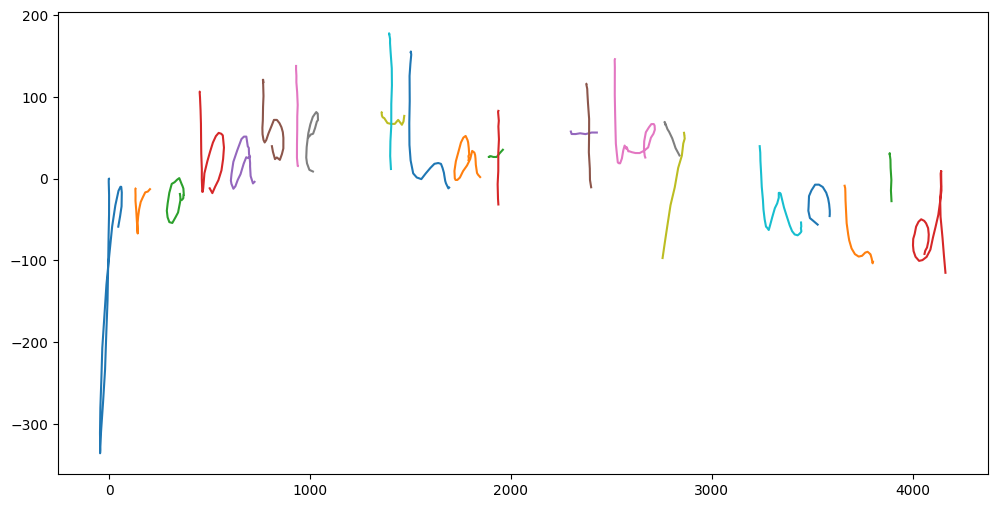

2 probable that they would


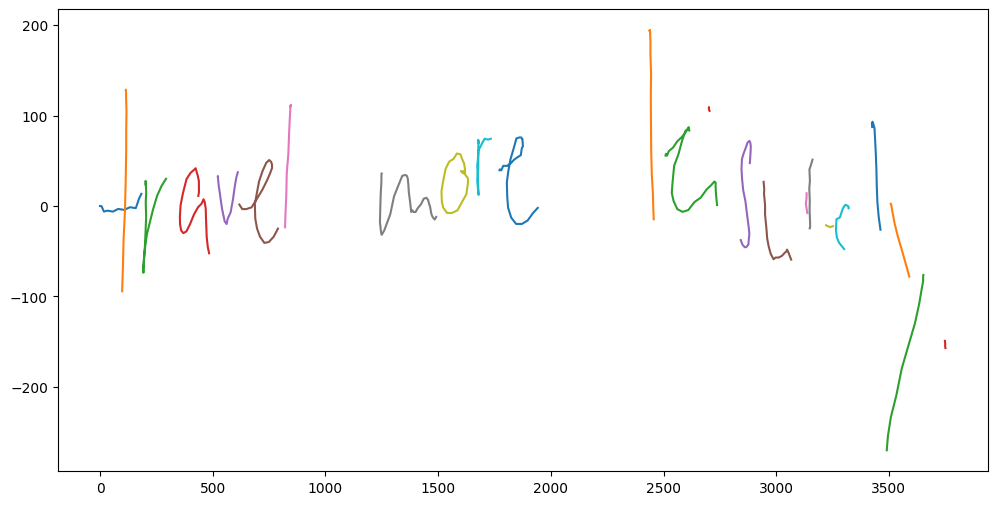

3 travel more leisurely.


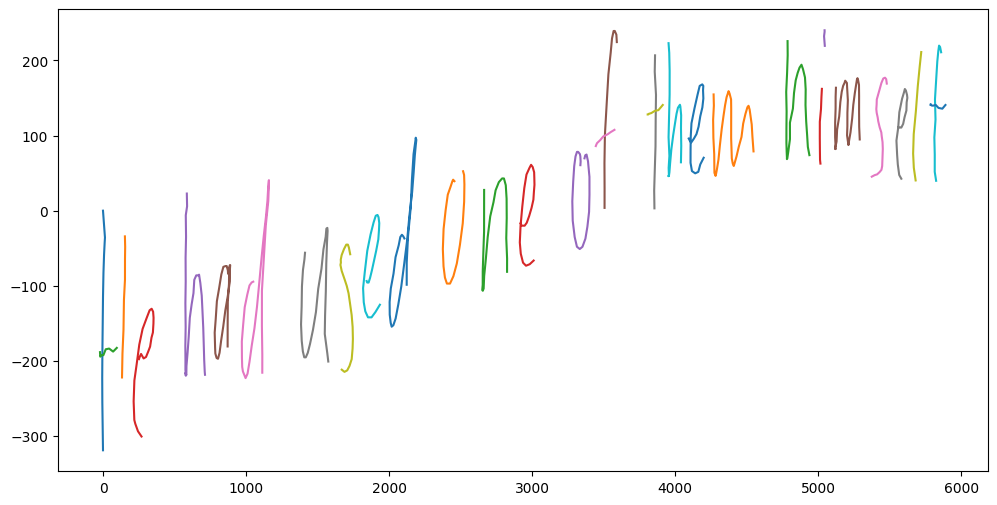

4 He had used one of them himself


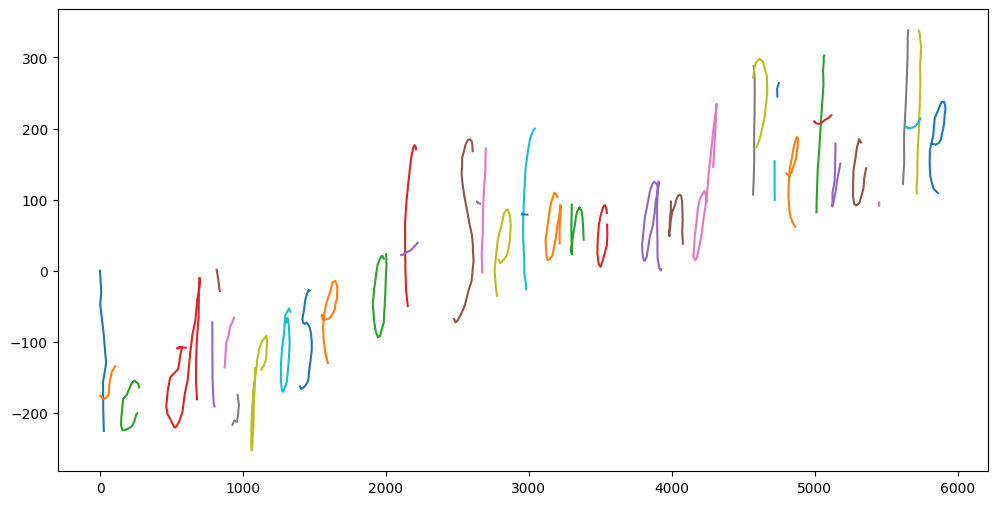

5 to dispose of Stefano and Pietro. He


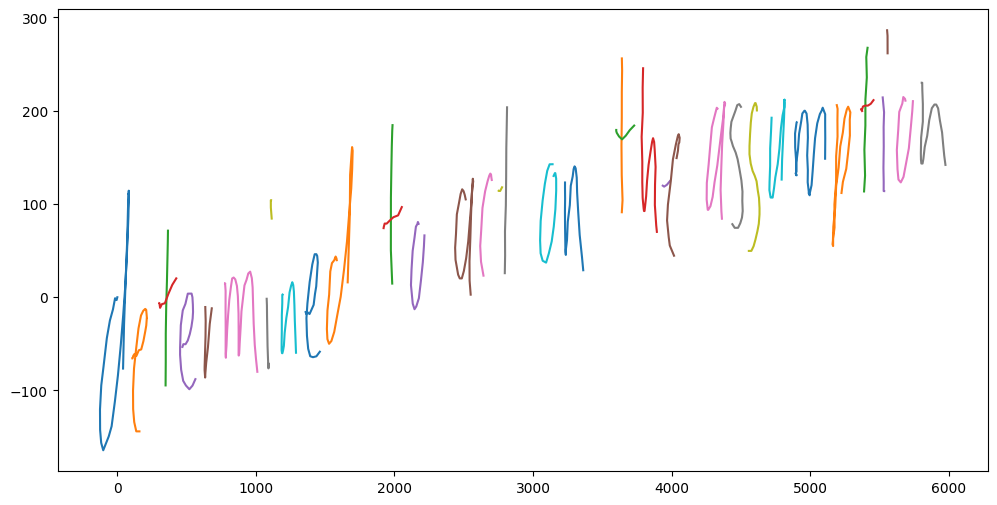

6 determined to act on the assumption


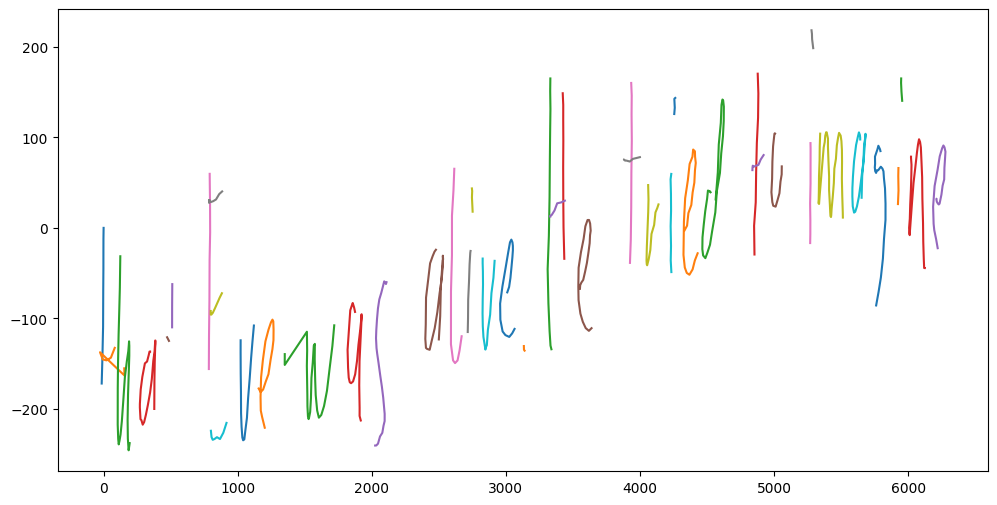

7 that Eve was alive. He tried to imagine


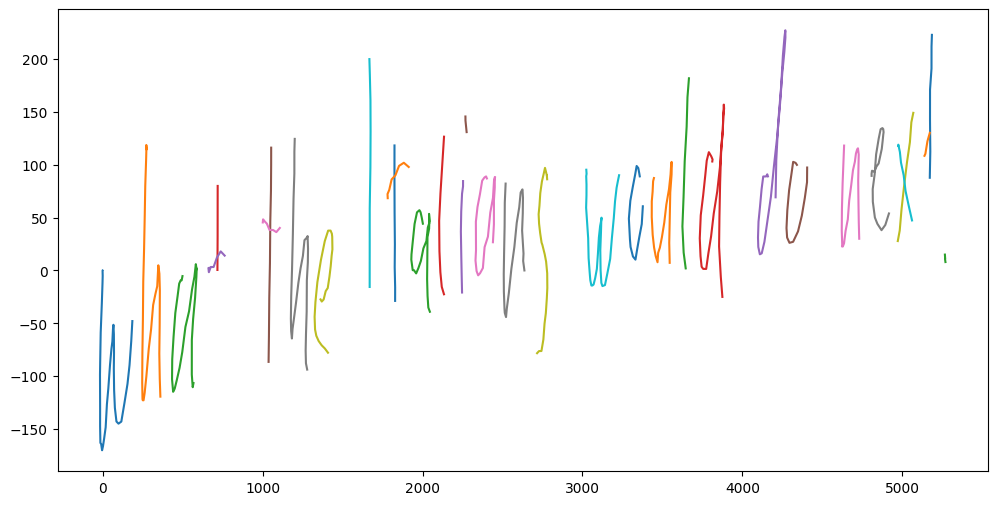

8 what the Italians would do next.


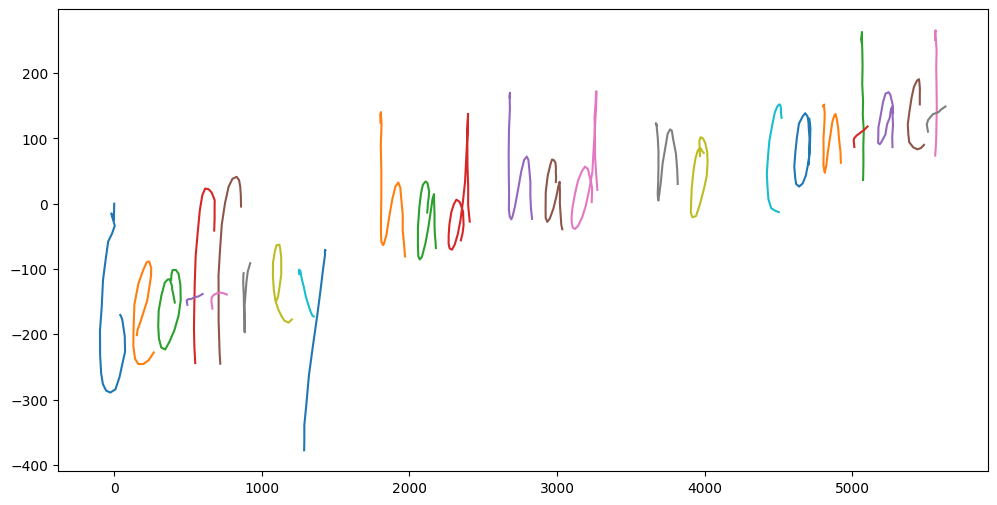

9 Geoffrey had had no contact


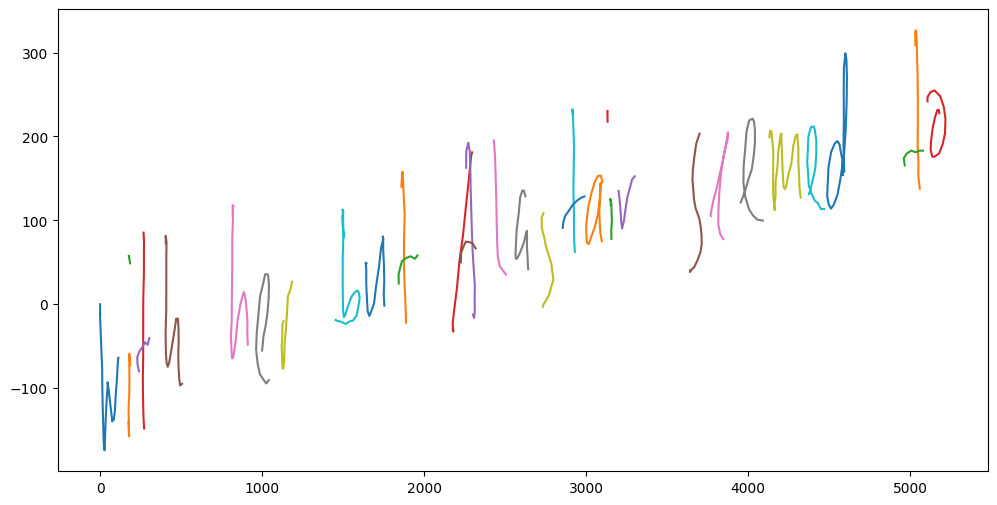

10 with her but Alastair seemed to


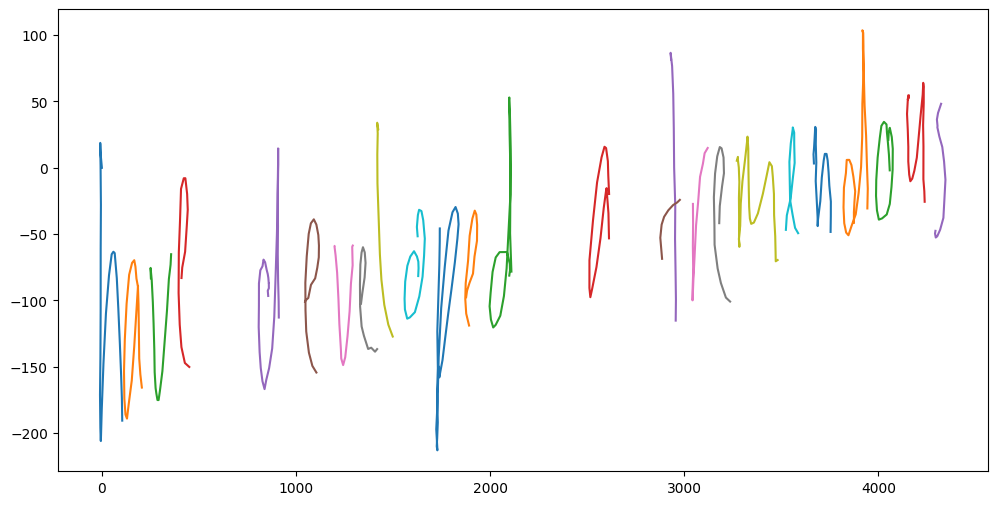

11 have developed a tremendous


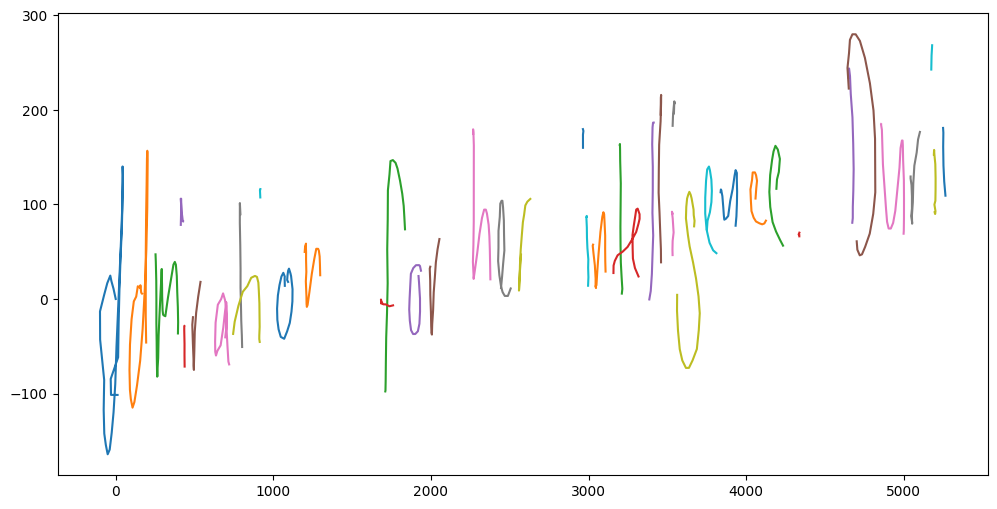

12 admiration for her intelligence. During


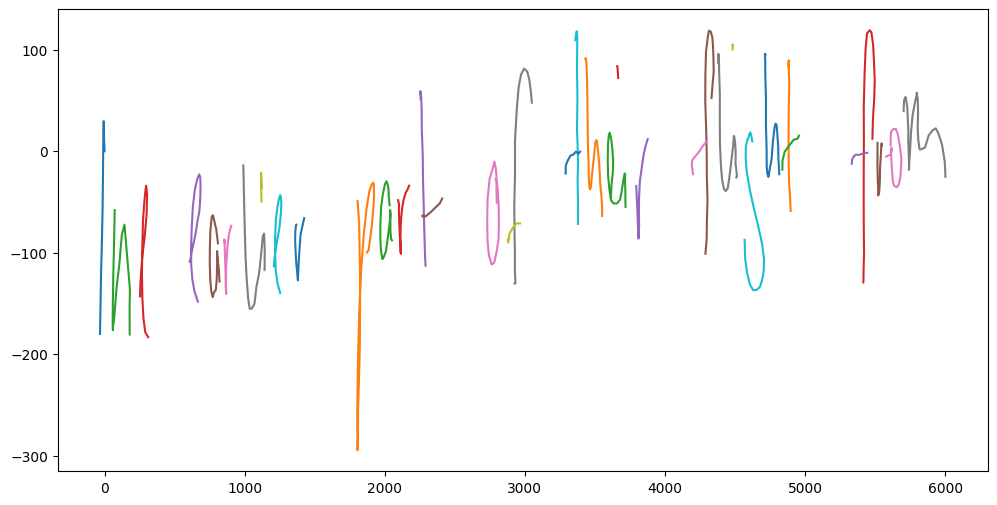

13 the earlier part of their flight from


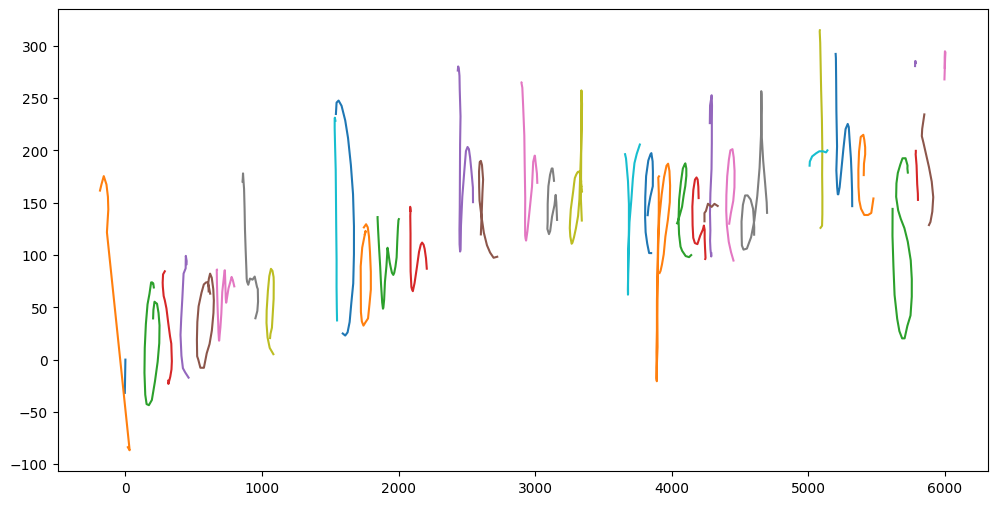

14 Boscombe Down he had repeated the gist


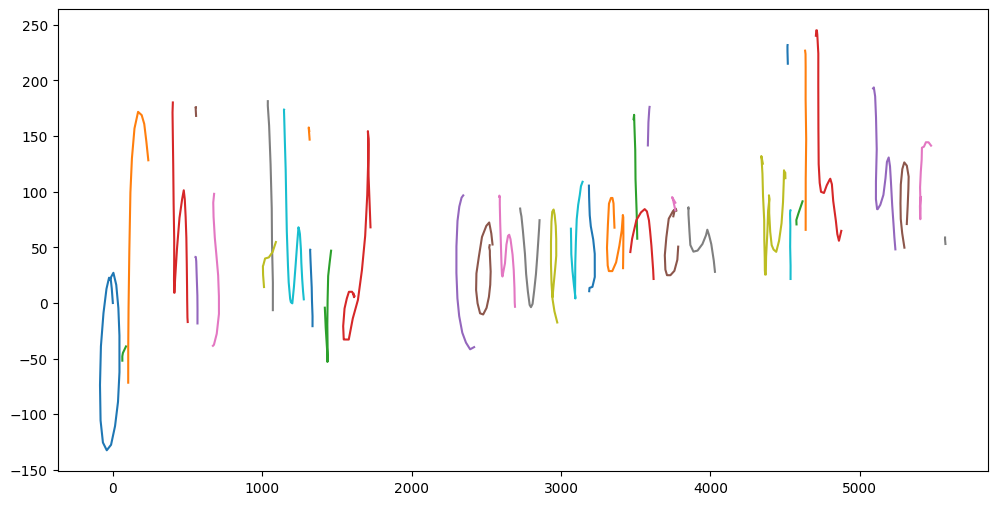

15 of his third conversation with her.


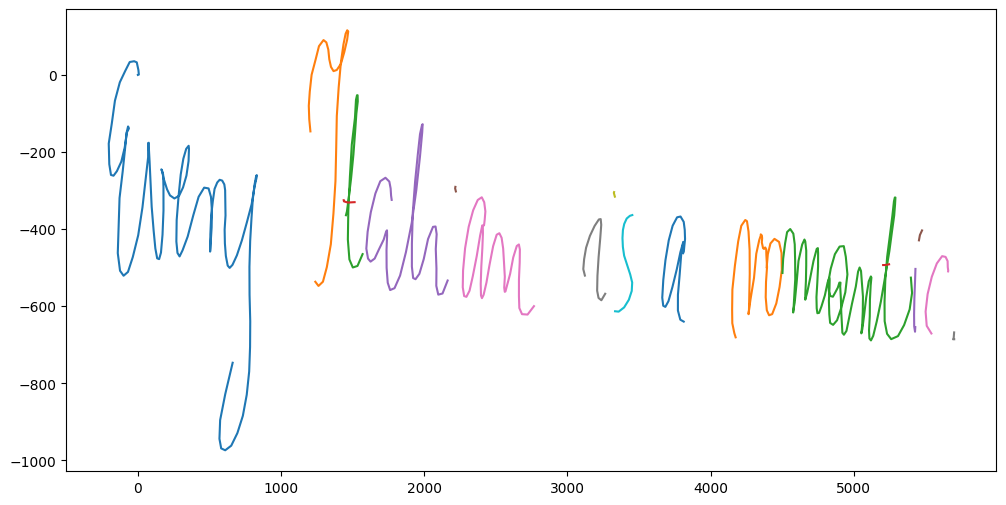

16 Every Italian is a romantic.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import torch

strokes, masks, onehots = np.load('datasets/data_iam_normalized/validation_strokes_700.npy'), np.load('datasets/data_iam_normalized/validation_masks_700.npy'), np.load('datasets/data_iam_normalized/validation_onehot_700.npy')

char_to_code = torch.load('datasets/data_iam_normalized/char_to_code.pt')
code_to_char = {b:a for a,b in char_to_code.items()}

for _, (seq, mask, onehot) in enumerate(zip(strokes, masks, onehots)):
    l = mask.sum().astype(int)
    seq = seq[1:l+1]
    #print(seq.shape)
    #print(np.array([42.903453, 37.58289517, 1.]).shape)
    seq_unnormed = (seq * np.array([1., 42.903453, 37.58289517])) + np.array([0., 8.37023456, 0.1114528])
    #seq = (seq * np.array([1., 11.86284, 6.452663])) + np.array([0., 1.4611896, 0.03389655])

    x, y = list(np.cumsum(seq_unnormed[:, 1:], axis=0).T)
    #x, y = list(seq[:, 1:].T)
    prev_idx = 0
    for idx in np.where(seq[:, 0] == 1)[0]:
        plt.plot(x[prev_idx:idx], -y[prev_idx:idx])
        prev_idx = idx + 1
    plt.show()
    label = ''.join([code_to_char[i] for i in np.where(onehot == 1)[1]])
    print(_, label)
    if _ == 16:
        break

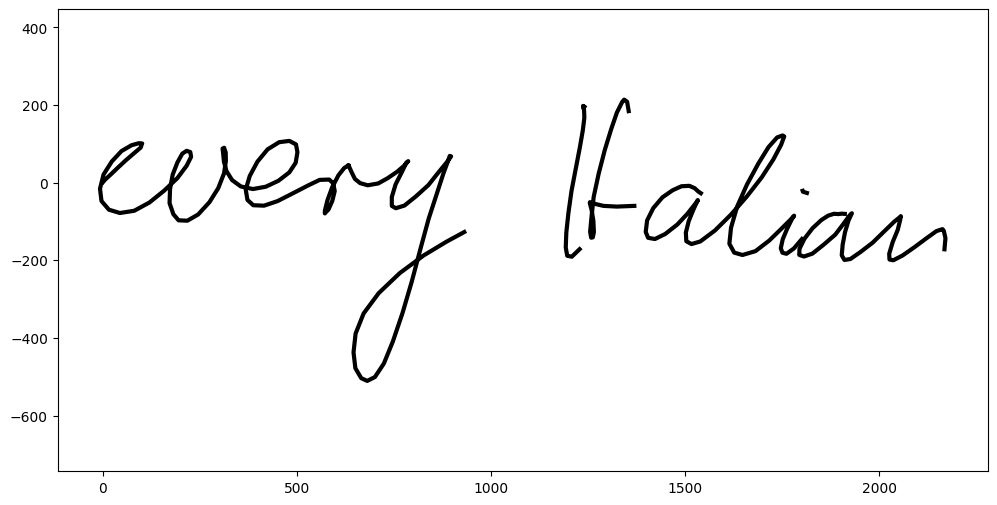

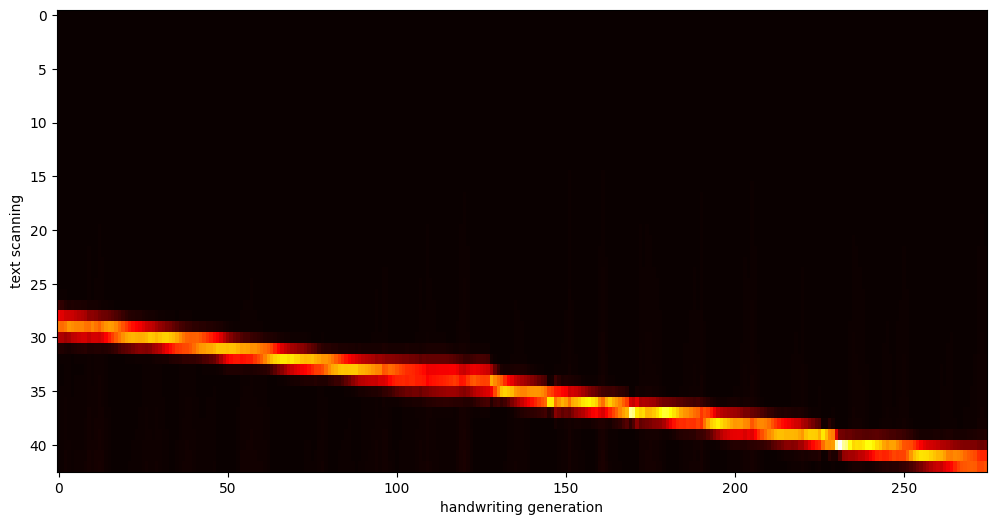

In [68]:
generate_conditionally('every Italian ', state_dict_file='outputs\\save_iam_successful\\epoch_60.pt', cell_size=512, char_to_code_file='datasets\\data_iam_normalized\\char_to_code.pt', bias=1., bias2=1., priming_x=torch.Tensor(seq).unsqueeze(0).cuda(), priming_text=label)